In [1]:
import numpy as np
from sklearn import svm
import pandas as pd
import cv2
import sklearn
import matplotlib.pyplot as plt

## filter img by brown mask

In [94]:
def areaFilter(minArea, inputImage):
    """
    filter img by color area
    :param minArea:
    :param inputImage:
    :return:
    """
    # Perform an area filter on the binary blobs:
    componentsNumber, labeledImage, componentStats, componentCentroids = \
        cv2.connectedComponentsWithStats(inputImage, connectivity=4)

    # Get the indices/labels of the remaining components based on the area stat
    # (skip the background component at index 0)
    remainingComponentLabels = [i for i in range(1, componentsNumber) if componentStats[i][4] >= minArea]

    # Filter the labeled pixels based on the remaining labels,
    # assign pixel intensity to 255 (uint8) for the remaining pixels
    filteredImage = np.where(np.isin(labeledImage, remainingComponentLabels) == True, 255, 0).astype('uint8')

    return filteredImage


def findBrown(img_hsv):
    """
    mask img:
    if in brown range -> 255
    else -> 0
    :param img_hsv:
    :return:
    """
    # brown color
    lower_values = np.array([10, 112, 99])
    upper_values = np.array([16, 194, 131])

    # Create the HSV mask
    mask = cv2.inRange(img_hsv, lower_values, upper_values)

    # Run a minimum area filter:
    minArea = 800
    mask_img = areaFilter(minArea, mask)
    return mask_img

def filterMask(masked_img):
    """
    filter the masked img to ignore layout
    :param masked_img:
    :return:
    """
    # Pre-process mask:
    kernelSize = 3

    structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
    iterations = 5

    mask = cv2.morphologyEx(masked_img, cv2.MORPH_DILATE, structuringElement, None, None, iterations,
                            cv2.BORDER_REFLECT101)
    mask = cv2.morphologyEx(masked_img, cv2.MORPH_ERODE, structuringElement, None, None, iterations,
                            cv2.BORDER_REFLECT101)
    return mask


def minMax_hsv(img_hsv):
    h, s, v = cv2.split(img_hsv)
    print("min h: ", np.min(h), ", s: ", np.min(s), ", v: ", np.min(v))
    print("max h: ", np.max(h), ", s: ", np.max(s), ", v: ", np.max(v))


def imgShow(img_path):
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(24,8))
    img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    plt.sca(axs[0])
    plt.imshow(img[:,:,::-1])
    plt.title("RGB")
    plt.sca(axs[1])
    plt.imshow(img_hsv[:,:,::-1])
    plt.title("HSV")
    plt.sca(axs[2])
    masked_img = findBrown(img_hsv)
    plt.imshow(masked_img)
    plt.title("masked_img")
    plt.sca(axs[3])
    filter_img = filterMask(masked_img)
    plt.imshow(filter_img)
    plt.title("filter_img")
    plt.show()


## mark mold pixels on RGB

### 1. mold img(3)

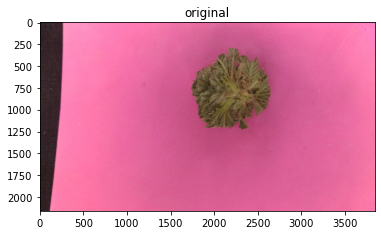

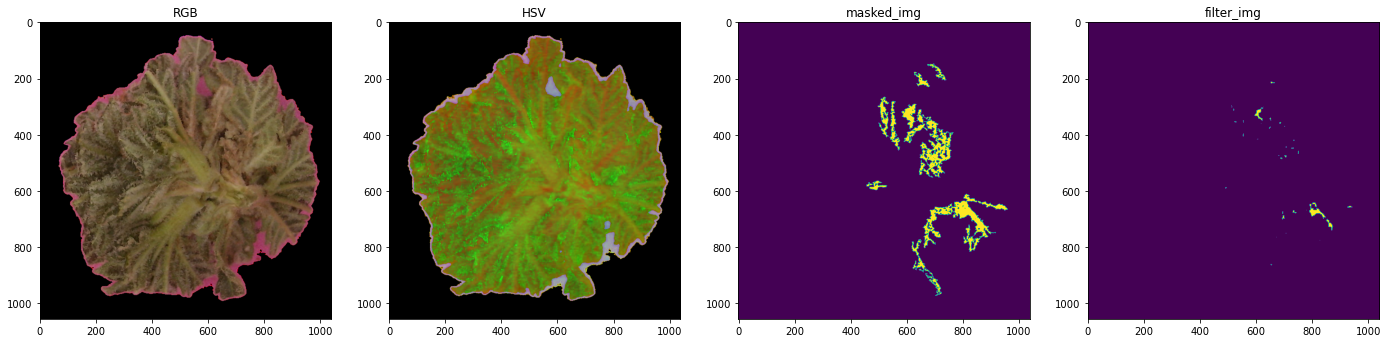

In [95]:
#original img
img = cv2.imread(str(3) + '\\rgb_0.JPG', cv2.COLOR_BGR2RGB)
plt.imshow(img[:,:,::-1])
plt.title("original")
plt.show()

img_path = str(3) + '\\rgb_0-rem.png'
imgShow(img_path)

### 2. NOT mold img(41)

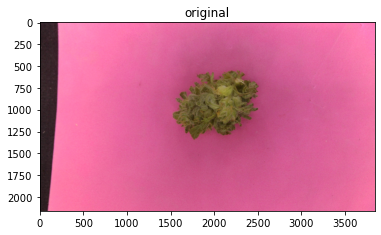

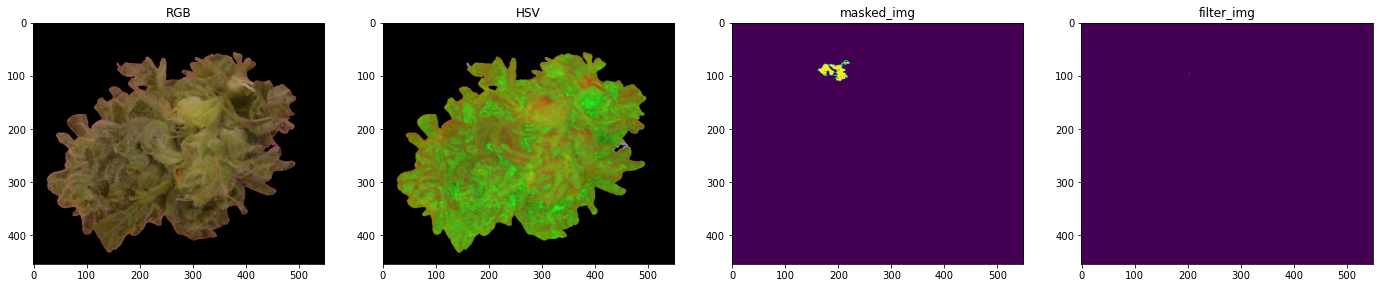

In [96]:
#original img
img = cv2.imread(str(41) + '\\rgb_0.JPG', cv2.COLOR_BGR2RGB)
plt.imshow(img[:,:,::-1])
plt.title("original")
plt.show()

img_path = str(41) + '\\rgb_0-rem.png'
imgShow(img_path)

### 3. NOT mold img(45)

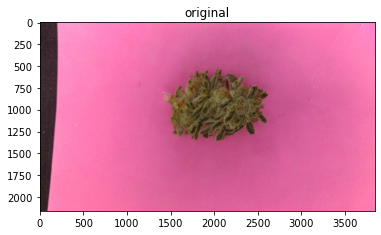

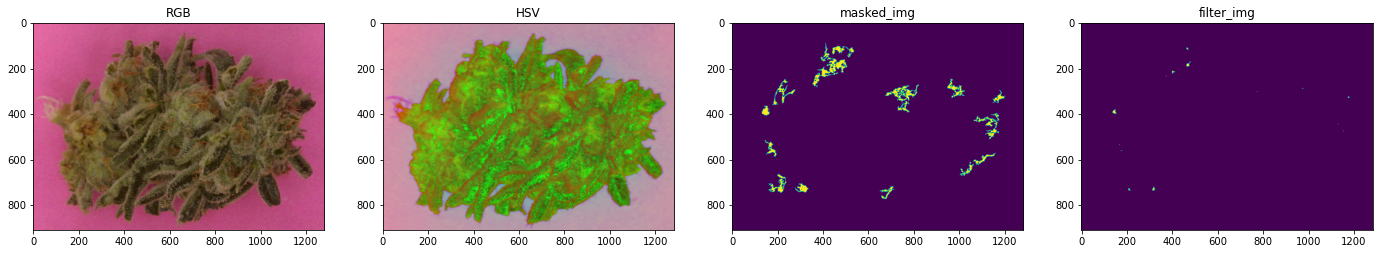

In [97]:
#original img
img = cv2.imread(str(45) + '\\rgb_0.JPG', cv2.COLOR_BGR2RGB)
plt.imshow(img[:,:,::-1])
plt.title("original")
plt.show()

img_path = str(45) + '\\rgb_0_crop.jpg'
imgShow(img_path)

## compare between similar mold & NOT mold

   * 91 --> mold
   * 67 --> not mold
   * 45 --> not mold

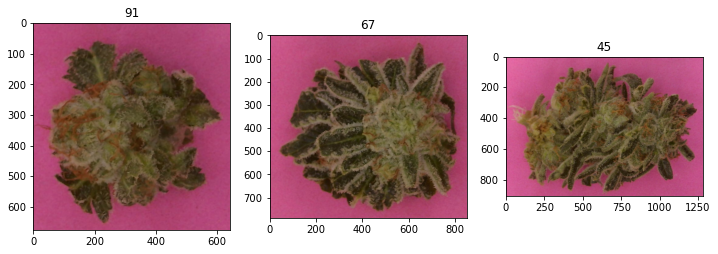

In [85]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
num = [91, 67, 45]
for i in range(len(num)):   
    plt.sca(axs[i])
    img = cv2.imread(str(num[i]) + '\\rgb_0_crop.JPG', cv2.COLOR_BGR2RGB)
    plt.imshow(img[:,:,::-1])
    plt.title(str(num[i]))
plt.show()


## LED IMAGES

### layers separation

In [72]:
def plot_img_layers(img_path):
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
    img = cv2.imread(img_path)
    plt.sca(axs[0])
    plt.imshow(img)
    plt.title(img_path)
    plt.sca(axs[1])
    plt.imshow(img[:,:,0])
    plt.title("layer 1")
    plt.sca(axs[2])
    plt.imshow(img[:,:,1])
    plt.title("layer 2")
    plt.sca(axs[3])
    plt.imshow(img[:,:,2])
    plt.title("layer 3")
    plt.show()

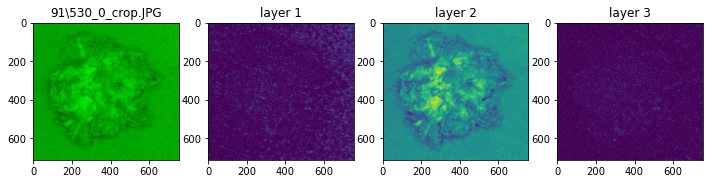

In [73]:
plot_img_layers(str(91) + '\\530_0_crop.JPG')

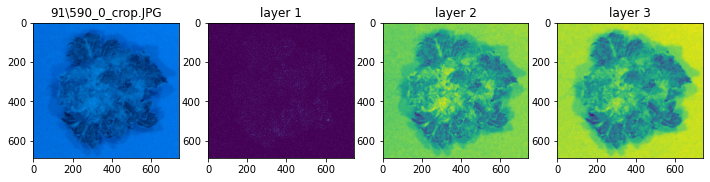

In [86]:
plot_img_layers(str(91) + '\\590_0_crop.JPG')

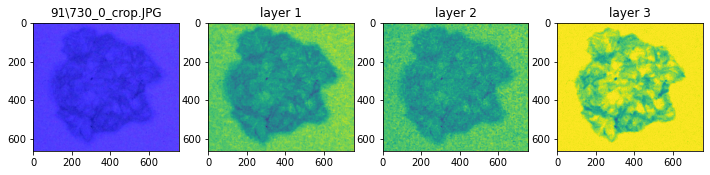

In [87]:
plot_img_layers(str(91) + '\\730_0_crop.JPG')

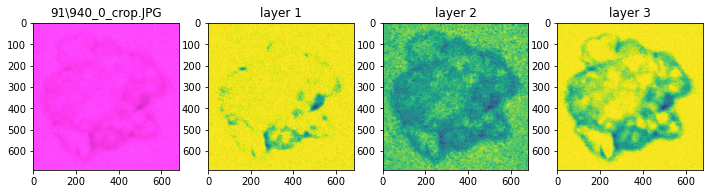

In [88]:
plot_img_layers(str(91) + '\\940_0_crop.JPG')